In [47]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [49]:
def square(x):
    return np.power(x,2)

In [50]:
def f1f2(chain,x):
    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

In [51]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

In [52]:
def chain_rule(chain, inputs):
#     Chain Rule -> (f2(f1(x)))' = f2'(f1(x)) * f1'(x)
    f1 = chain[0]
    f2 = chain[1]

    # calculate df1/dx
    f1_x = f1(inputs)
    # calculate df1/du
    df1dx = deriv(f1,inputs)
    #calculate df2/du
    df2du = deriv(f2, f1_x)
    return df1dx*df2du

In [53]:
inputs = np.arange(-5,5,.01)
chain1 = [square,sigmoid]
chain2 = [sigmoid,square]


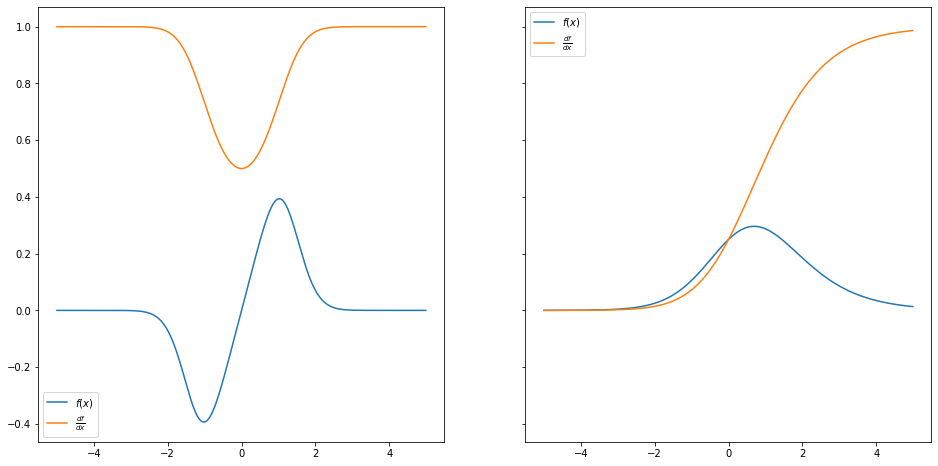

In [54]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

#chain1 deriv
chain1_output = chain_rule(chain1,inputs)
ax[0].plot(inputs, chain1_output)
f1f1_output_1 = f1f2(chain1,inputs)
ax[0].plot(inputs, f1f1_output_1)
    

chain2_output = chain_rule(chain2, inputs)
ax[1].plot(inputs, chain2_output)
f1f1_output_2 = f1f2(chain2,inputs)
ax[1].plot(inputs,f1f1_output_2)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])